In [ ]:
from supportkit import generate_2d_coord
generate_2d_coord(1, 3)

array([[-1.-1.j,  0.-1.j,  1.-1.j],
       [-1.+0.j,  0.+0.j,  1.+0.j],
       [-1.+1.j,  0.+1.j,  1.+1.j]])

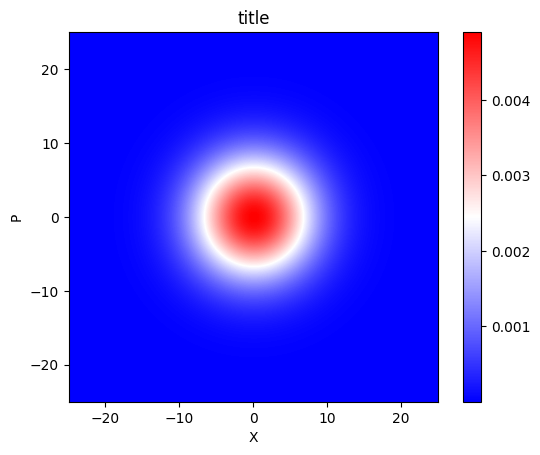

In [ ]:
from supportkit import plot_complex_2dfunc, generate_2d_gaussian
D, S = generate_2d_gaussian(
    means = [0, 0],
    sigmas = [5.7, 5.7], 
    ranges = [25, 25], 
    num_points = 1024
)
plot_complex_2dfunc(D, S)

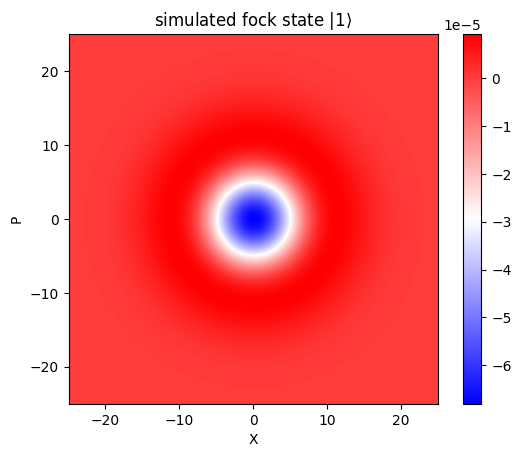

In [2]:
from supportkit import plot_complex_2dfunc, generate_2d_gaussian
import numpy as np
#set_plot_style()
D_h, S = generate_2d_gaussian(
    means = [0, 0] , 
    sigmas = [5.7, 5.7], 
    ranges = [25, 25], 
    num_points = 1024
)
D_S, S = generate_2d_gaussian(
    means = [0, 0] , 
    sigmas = [5.74, 5.74], 
    ranges = [25, 25], 
    num_points = 1024
)
#D_h = D_h / np.max(D_h)
#D_S = D_S / np.max(D_S)
D = D_S - D_h
plot_complex_2dfunc(D, S, title='simulated fock state $|1\\rangle$')

In [3]:
from utility import eva_S_moment, eva_h_moment_anti
for n in range(4):
    for m in range(4):
        print(f'<S{n}{m}> = {eva_S_moment(S, n, m, D): .4f}', end=',\t')
        print(f'<h{n}{m}> = {eva_h_moment_anti(S, n, m, D_h): .4f}')

<S00> = -0.0000+0.0000j,	<h00> =  1.0000+0.0000j
<S01> = -0.0000-0.0000j,	<h01> =  0.0000+0.0000j
<S02> = -0.0000+0.0000j,	<h02> =  0.0000+0.0000j
<S03> =  0.0000+0.0000j,	<h03> = -0.0000+0.0000j
<S10> = -0.0000+0.0000j,	<h10> =  0.0000-0.0000j
<S11> =  0.9127+0.0000j,	<h11> =  64.9637+0.0000j
<S12> = -0.0000-0.0000j,	<h12> =  0.0000-0.0000j
<S13> =  0.0000+0.0000j,	<h13> =  0.0000+0.0000j
<S20> = -0.0000-0.0000j,	<h20> =  0.0000-0.0000j
<S21> = -0.0000+0.0000j,	<h21> =  0.0000+0.0000j
<S22> =  237.7082-0.0000j,	<h22> =  8432.8953-0.0000j
<S23> = -0.0000-0.0000j,	<h23> = -0.0000-0.0000j
<S30> =  0.0000-0.0000j,	<h30> = -0.0000-0.0000j
<S31> =  0.0000-0.0000j,	<h31> =  0.0000+0.0000j
<S32> = -0.0000+0.0000j,	<h32> = -0.0000+0.0000j
<S33> =  69154.0910-0.0000j,	<h33> =  1637432.5340-0.0000j


In [4]:
from utility import eva_qubit_moments
moment = eva_qubit_moments(S, D_S, D_h, highest_order=4)
moment['a04']

np.complex128(-1.16444042821949-9.170092586885327e-15j)

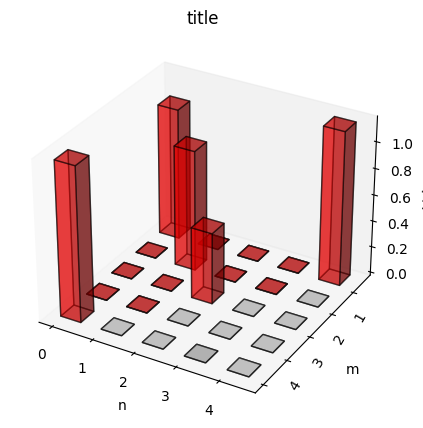

In [5]:
from supportkit import plot_moment_bar_diagram

plot_moment_bar_diagram(moment)

In [1]:
from utility import get_winger_function_func
from supportkit import generate_complex_2dcoord
import numpy as np

In [1]:
from utility import get_winger_function_func
from supportkit import generate_complex_2dcoord, plot_complex_2dfunc
import numpy as np
moments = {}
for n in range(3):
    for m in range(3):
        moments[f'a{n}{m}'] = 1 # coherent state
        
lambd = generate_complex_2dcoord(10, 50)
W = get_winger_function_func(3, 3, lambd, moments)

alpha = generate_complex_2dcoord(2, 151)
a = W(alpha)

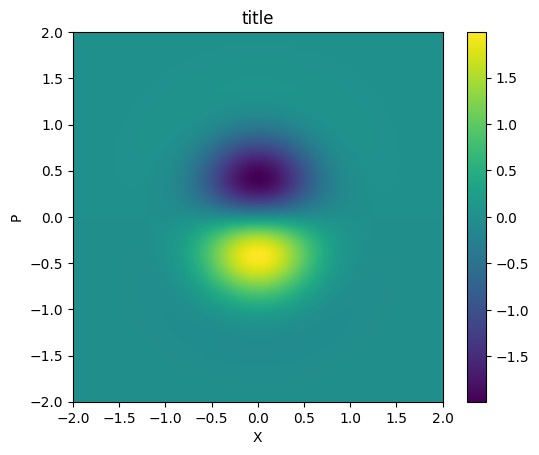

In [3]:
from supportkit import plot_complex_2dfunc
plot_complex_2dfunc(np.imag(a), alpha)

In [19]:
from supportkit import sym_eva_S_moment
sym_eva_S_moment(1, 1)

In [20]:
from supportkit import sym_eva_qubit_moments
moments = sym_eva_qubit_moments(subs_anm = False, highest_order=4)
moments['a11']

In [3]:
import numpy as np
def compute_tr_rho_adagn_am(rho: np.ndarray, n: int, m: int):
    """Computes Tr[rho a†^n a^m] for a given density matrix `rho`.

    Example usage:
    >>> rho = np.array([
    >>>     [0.5, 0, 0, 0, 0],
    >>>     [0, 0.3, 0, 0, 0],
    >>>     [0, 0, 0.2, 0, 0],
    >>>     [0, 0,  0,  0, 0],
    >>>     [0, 0,  0,  0, 0]
    >>> ])
    >>> compute_tr_rho_adagn_am(rho, 1, 1)
    OUTPUT:
    | 0.7 + 0j

    In quantum physics, Tr[rho A] is the expectation value of A on the 
    state represented by density matirx rho.
    """
    def get_annihilation_operator(dim):
        """Return matirx representation of annihilation operator a in `dim`-dimensional Hilbert-space.
        (Generate by AI)
        """
        a = np.zeros((dim, dim), dtype=complex)
        for n in range(1, dim):
            a[n-1, n] = np.sqrt(n)
        return a
    
    # get matirx representation of a and adag
    dim = rho.shape[0]
    a = get_annihilation_operator(dim)
    adag = a.conj().T  

    # Compute the expectation value: Tr[rho a†^n a^m]
    operator = np.dot(adag ** n, a ** m)
    expectation_value = np.trace(np.dot(rho, operator))
    
    return expectation_value